<a href="https://colab.research.google.com/github/nguyendo24/spark_issues/blob/master/dask_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip -q install "dask[complete]"

     |████████████████████████████████| 665kB 2.6MB/s 
     |████████████████████████████████| 92kB 4.9MB/s 
     |████████████████████████████████| 102kB 5.1MB/s 
ERROR: distributed 2.30.1 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.


In [32]:
! pip install dask

In [38]:
import numpy as np
import pandas as pd
import dask.array as da
import graphviz

In [ ]:
arr = np.random.randint(1, 1000, (1000, 1000))
darr = da.from_array(arr, chunks=(250, 250))
darr

dask.array<array, shape=(1000, 1000), dtype=int64, chunksize=(250, 250), chunktype=numpy.ndarray>

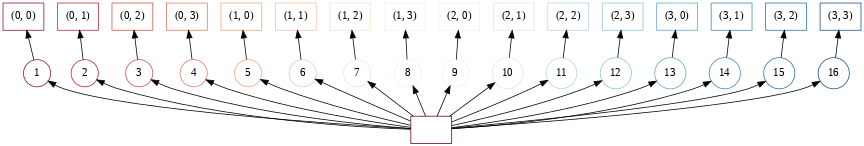

In [ ]:
darr.visualize(color="order", size="9,10!")

In [40]:
import dask.dataframe as dd
import numpy as np


In [ ]:
arr = np.random.normal(0.0, 1.0, size=(1000000, 10))
df = dd.from_array(arr, chunksize=50000, columns=[f"col-{i+1}" for i in range(10)])
del arr
gc.collect()


0

In [ ]:
df

,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10
npartitions=20,,,,,,,,,,
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
50000,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...
950000,...,...,...,...,...,...,...,...,...,...
999999,...,...,...,...,...,...,...,...,...,...


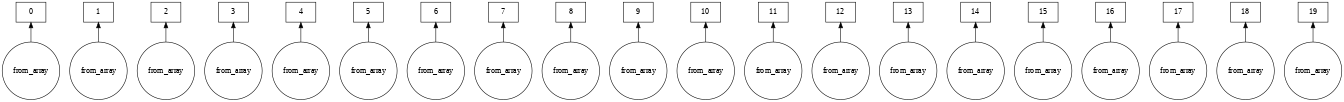

In [ ]:

df.visualize(size="14,16!")

In [ ]:
type(df)

dask.dataframe.core.DataFrame

In [41]:
import pandas as pd

In [42]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'age': ['42; 3', '4' , '52', '36', '24'], 
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42; 3,4,25
1,Molly,Jacobson,4,24,94
2,Tina,Ali,52,31,57
3,Jake,Milner,36,2,62
4,Amy,Cooze,24,3,70


In [43]:
ddf = dd.from_pandas(df, npartitions=1)

In [44]:
print(ddf)

Dask DataFrame Structure:
              first_name last_name     age preTestScore postTestScore
npartitions=1                                                        
0                 object    object  object        int64         int64
4                    ...       ...     ...          ...           ...
Dask Name: from_pandas, 1 tasks


In [45]:
ddf.head()

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42; 3,4,25
1,Molly,Jacobson,4,24,94
2,Tina,Ali,52,31,57
3,Jake,Milner,36,2,62
4,Amy,Cooze,24,3,70


In [46]:
ddf.dtypes

first_name       object
last_name        object
age              object
preTestScore      int64
postTestScore     int64
dtype: object

In [53]:
type(ddf)

dask.dataframe.core.DataFrame

In [50]:
ddf2 = ddf.assign(age=ddf.age.str.split(";")).explode("age")

In [52]:
ddf2.head()

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
0,Jason,Miller,3,4,25
1,Molly,Jacobson,4,24,94
2,Tina,Ali,52,31,57
3,Jake,Milner,36,2,62


In [54]:
ddf2.dtypes

first_name       object
last_name        object
age              object
preTestScore      int64
postTestScore     int64
dtype: object

In [67]:
ddf3 = ddf2.groupby('age').agg({'preTestScore':['max']}).compute()

In [68]:
ddf3

,preTestScore
,max
age,
3,4
24,3
36,2
4,24
42,4
52,31


In [59]:
print(ddf3)

In [69]:
ddf2.groupby('first_name').agg({'age':['max']}).compute().head()

,age
,max
first_name,
Amy,24
Jake,36
Jason,42
Molly,4
Tina,52


In [60]:
ddf3

In [70]:
ddf3 = ddf2.groupby('first_name').agg({'age':['count']}).compute()

In [71]:
ddf3

,age
,count
first_name,
Amy,1
Jake,1
Jason,2
Molly,1
Tina,1


In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
  
author = ['Jitender; adgag', 'Purnima', 'Arpit', 'Jyoti'] 
article = ['210; 235', '211', '114', '178'] 
age = ['21; 23', '21', '24', '23'] 
auth_series = pd.Series(author) 
article_series = pd.Series(article) 
  
frame = { 'Author': auth_series, 'Article': article_series, 'Age': age } 
result = pd.DataFrame(frame) 

print(result) 

            Author   Article     Age
0  Jitender; adgag  210; 235  21; 23
1          Purnima       211      21
2            Arpit       114      24
3            Jyoti       178      23


In [5]:
result.dtypes

Author     object
Article    object
Age        object
dtype: object

In [6]:
result

,Author,Article,Age
0,Jitender; adgag,210; 235,21; 23
1,Purnima,211,21
2,Arpit,114,24
3,Jyoti,178,23


In [25]:
res2 = result.assign(Author=result.Author.str.split(";")).explode("Author")

In [26]:
res2

,Author,Article,Age
0,Jitender,210; 235,21; 23
0,adgag,210; 235,21; 23
1,Purnima,211,21
2,Arpit,114,24
3,Jyoti,178,23


In [23]:
res3 = res2.assign(Author=res2.Author.str.split(",")).explode("Author")

In [24]:
res3

,Author,Article,Age
0,NaN,210; 235,21; 23
1,NaN,211,21
2,NaN,114,24
3,NaN,178,23


In [15]:

b2

,index,0
0,0,Jitender; adgag
1,0,Purnima
2,0,Arpit
3,0,Jyoti


In [8]:
a = pd.DataFrame([{'var1': 'a,b,c', 'var2': 1},
               {'var1': 'd,e,f', 'var2': 2}])

In [9]:
a


,var1,var2
0,"a,b,c",1
1,"d,e,f",2


In [12]:
b = pd.concat([pd.Series(row['var2'], row['var1'].split(','))              
                    for _, row in a.iterrows()]).reset_index()

In [13]:
b

,index,0
0,a,1
1,b,1
2,c,1
3,d,2
4,e,2
5,f,2
